# **Exercise 1**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import subprocess

In [2]:
exe_dir = "/home/aswathy/DATA_ANALYSIS/datalab/code"
#output_dir = "/home/aswathy/DATA_ANALYSIS/datalab/solutions/Exercise_1"
data_dir = "/home/aswathy/DATA_ANALYSIS/datalab/solutions/Exercise_1"

# **Task 1**  
Plot various realisations of signal plus noise. Use different signal amplitudes with generate_source until you can not distinguish the signal because it is too faint.

In [3]:
#Define a function to run generate_source 
"""
Usage: ./generate_source  [-h] [-o <file>] [-s <float>] [-d <float>] [-N <int>] [-f <float>] [-p <float>]
                          [-a <float>] [-r <int>]
  -o, --output=<file>       output file
  -s, --sigma=<float>       standard deviation sigma
  -d, --deltaT=<float>      delta T betwean measurements
  -N, --length=<int>        number of elements
  -f, --freq=<float>        frequency
  -p, --phase=<float>       phase
  -a, --amplitude=<float>   signal amplitude
  -r, --random=<int>        if set to 1, generate random signal
  -h, --help                print this help and exit
"""      

def generate_source(outputFile=None, sigma=0, f=10, A=1, delta_T=None, N=10000, phi=0, r=0):
    if delta_T == None : 
        delta_T = 1/N
           
    dataPath = os.path.join(data_dir, outputFile)
    exe_path = os.path.join(exe_dir, 'generate_source')
    cmd_str = f"{exe_path} -o {dataPath} -s {sigma} -d {delta_T} -N {N} -f {f} -p {phi} -a {A} -r {r}"
    
    print(cmd_str)
    
    cmd = cmd_str.split(' ')
    process = subprocess.Popen(cmd,stdout=subprocess.PIPE)
    out, err = process.communicate()
    if err:
        print('The process raised an error:', err.decode())
    if out:
        print('The process has an output:', out.decode())

    return

In [4]:
#Define a funtion to plot the data generated using generate_source

def plot_data(filename, title=None):       
    dataPath = os.path.join(data_dir, filename)
    data = np.loadtxt(dataPath)
    plt.plot(data[:,0],data[:,1])
    plt.xlabel("t(s)", fontsize=12)
    plt.ylabel("dt", fontsize=12)
    if (title):
        plt.title(title, fontsize=15)
    plt.savefig(dataPath.replace('.csv', '.jpg'))
    plt.show()
    plt.close()

/home/aswathy/DATA_ANALYSIS/datalab/code/generate_source -o /home/aswathy/DATA_ANALYSIS/datalab/solutions/Exercise_1/data_01.csv -s 0.0 -d 0.0001 -N 10000 -f 10 -p 0 -a 1 -r 0


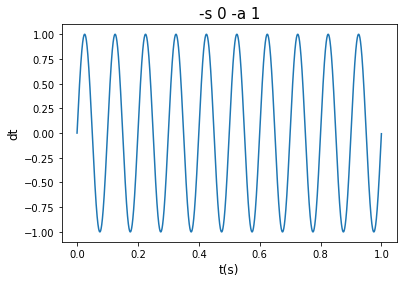

/home/aswathy/DATA_ANALYSIS/datalab/code/generate_source -o /home/aswathy/DATA_ANALYSIS/datalab/solutions/Exercise_1/data_02.csv -s 0.5 -d 0.0001 -N 10000 -f 10 -p 0 -a 1 -r 0


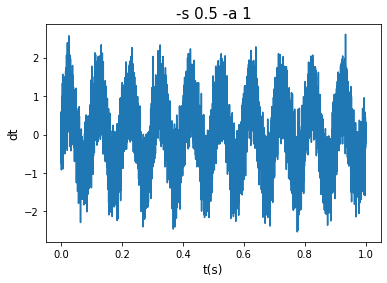

/home/aswathy/DATA_ANALYSIS/datalab/code/generate_source -o /home/aswathy/DATA_ANALYSIS/datalab/solutions/Exercise_1/data_03.csv -s 5 -d 0.0001 -N 10000 -f 10 -p 0 -a 1 -r 0


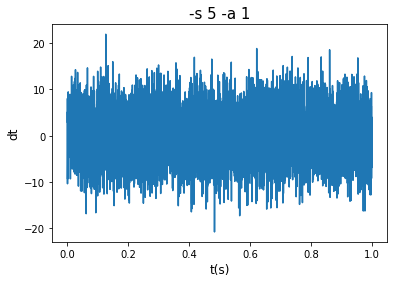

/home/aswathy/DATA_ANALYSIS/datalab/code/generate_source -o /home/aswathy/DATA_ANALYSIS/datalab/solutions/Exercise_1/data_04.csv -s 10 -d 0.0001 -N 10000 -f 10 -p 0 -a 1 -r 0


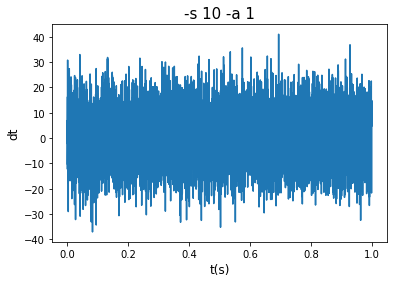

/home/aswathy/DATA_ANALYSIS/datalab/code/generate_source -o /home/aswathy/DATA_ANALYSIS/datalab/solutions/Exercise_1/data_05.csv -s 10 -d 0.0001 -N 10000 -f 10 -p 0 -a 0 -r 0


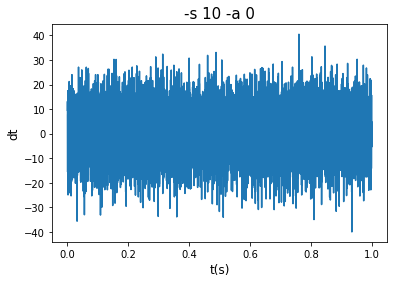

In [7]:
#Create a dictionary with a set of values to run generate_source with
data_set = {
    1: {
        'sigma': 0.0,
        'A': 1,
        'f': 10,
        'delta_T': 0.0001,
        'filename': "data_01.csv",
        'title': "-s 0 -a 1",
    },
    2: {
        'sigma': 0.5,
        'A': 1,
        'f': 10,
        'delta_T': 0.0001,
        'filename': "data_02.csv",
        'title': "-s 0.5 -a 1",
    },
    3: {
        'sigma': 5,
        'A': 1,
        'f': 10,
        'delta_T': 0.0001,
        'filename': "data_03.csv",
        'title': "-s 5 -a 1",
    },
    4: {
        'sigma': 10,
        'A': 1,
        'f': 10,
        'delta_T': 0.0001,
        'filename': "data_04.csv",
        'title': "-s 10 -a 1",
    },
    5 : {
        'sigma': 10,
        'A': 0,
        'f': 10,
        'delta_T': 0.0001,
        'filename': "data_05.csv",
        'title': "-s 10 -a 0",
    }
}

for key, value in data_set.items():
    generate_source(value.get('filename'), sigma=value.get('sigma'), A=value.get('A'), f=value.get('f'), delta_T=value.get('delta_T'))
    plot_data(value.get('filename'), title=value.get('title'))

# **Task 2**
Learn to use prober, our small black box program computing a scalar result based upon input
time series and parameter point (f, φ).

In [8]:
"""
Usage: ./prober  [-h] [-i <file>] [-o <file>] [-f <float>] [-p <float>] [-t <file>] [-m <int>]
  -i, --input=<file>        input file
  -o, --output=<file>       output file
  -f, --freq=<float>        frequency
  -p, --phase=<float>       phase
  -h, --help                print this help and exit
  -t, --templatebank=<file> template bank file
  -m, --method=<int>        select method to analyze signal 1, 2 or 3
"""

def prober(inputFile, f=0, outputFile=None, phi=0, template=None, mod=0):
    
    exe_path = os.path.join(exe_dir, 'prober')
    cmd_str = f"{exe_path} -i {data_dir}/{inputFile} -o {data_dir}/{outputFile} -m {mod}"
    if template:
        cmd_str += f" -t {data_dir}/{template} "
    else:
        cmd_str += f" -f {f} -p {phi}"
        
    cmd = cmd_str.split(' ')
    process = subprocess.Popen(cmd,stdout=subprocess.PIPE)
    out, err = process.communicate()
    if err:
        print('The process raised an error:', err.decode())
    if out:
        print('The process has an output:', out.decode())
    
    return

In [9]:
prober("data_01.csv", f=10, mod=1)

The process has an output: 10 0 0.5



# **Task 3**
Learn how prober results change, varying the parameters of an injected signal while probing
the same parameter point

In [10]:
for i in range(1,6):
    prober(f"data_0{i}.csv", f=10, mod=1)

The process has an output: 10 0 0.5

The process has an output: 10 0 0.499989

The process has an output: 10 0 0.533685

The process has an output: 10 0 0.511316

The process has an output: 10 0 -0.0457719



In [11]:
for i in range(1,6):
    prober(f"data_0{i}.csv", f=10, mod=2)

The process has an output: 10 0 3.34998e-13

The process has an output: 10 0 0.24899

The process has an output: 10 0 24.9441

The process has an output: 10 0 97.7847

The process has an output: 10 0 100.269



Prober result at different frequency

In [12]:
for i in range(1,6):
    prober(f"data_0{i}.csv", f=5, mod=1)

The process has an output: 5 0 1.99918e-10

The process has an output: 5 0 0.00348131

The process has an output: 5 0 -0.00744086

The process has an output: 5 0 -0.128151

The process has an output: 5 0 0.07294



In [13]:
for i in range(1,6):
    prober(f"data_0{i}.csv", f=5, mod=2)

The process has an output: 5 0 1

The process has an output: 5 0 1.242

The process has an output: 5 0 26.0263

The process has an output: 5 0 99.0637

The process has an output: 5 0 100.031



Prober result at different phase

In [14]:
for i in range(1,6):
    prober(f"data_0{i}.csv", f=10, phi=0.25, mod=1)

The process has an output: 10 0.25 0.484459

The process has an output: 10 0.25 0.483307

The process has an output: 10 0.25 0.50252

The process has an output: 10 0.25 0.48637

The process has an output: 10 0.25 -0.0337911



In [15]:
for i in range(1,6):
    prober(f"data_0{i}.csv", f=10, phi=0.25, mod=2)

The process has an output: 10 0.25 0.0310878

The process has an output: 10 0.25 0.28235

The process has an output: 10 0.25 25.0065

The process has an output: 10 0.25 97.8346

The process has an output: 10 0.25 100.245



# **Task 4**
Plot/document result findings: how large may the mismatch between injection and probe
parameter may become? What happens with weak signals (small amplitude)?

In [16]:
def new_plot_data(prober_results, mode, freq):
    data = np.loadtxt(os.path.join(data_dir, prober_results))
    plt.figure()
    plt.xlabel("f(Hz)")
    plt.xlabel("S(f)")
    plt.xlim([0.0,100.0])
    plt.plot(data[:,0],data[:,2])
    plt.show()
    
    #S_2 searching for the minimum value
    if mode == 2:
        best = np.where(data[:,2] == np.min(data[:,2]))
        print("Frequency  f = {0:.3f}Hz".format(freq))
        print("Minimum value is at f = {0:.3f}Hz".format(data[:,0][best][0]))
        print("Minimum Value       = {0:.3f} ({0:.8f})".format(data[:,2][best][0]))
    else:
        best = np.where(data[:,2] == np.max(data[:,2]))
        print("Frequency  f = {0:.3f}Hz".format(freq))
        print("Maximum value is at f = {0:.3f}Hz".format(data[:,0][best][0]))
        print("Maximum Value       = {0:.3f} ({0:.8f})".format(data[:,2][best][0]))
        
    

In [17]:
#creating a template_bank 
n = 50
freq = np.linspace(0.01, 100.0, n)
with open(f"{data_dir}/temp_bank.csv", "w") as file:
    for i in range(n):
        file.write("{0} {1}\n".format(freq[i],0))

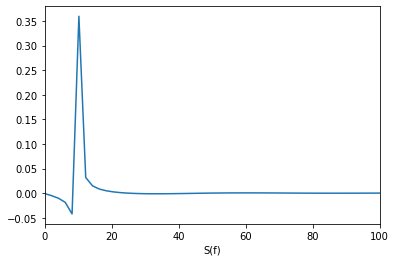

Frequency  f = 10.000Hz
Maximum value is at f = 10.213Hz
Maximum Value       = 0.360 (0.35965000)


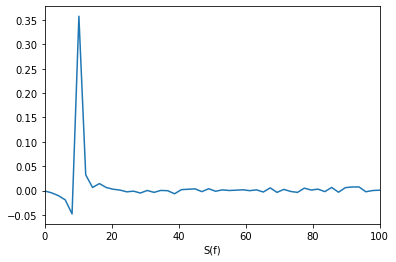

Frequency  f = 10.000Hz
Maximum value is at f = 10.213Hz
Maximum Value       = 0.358 (0.35779500)


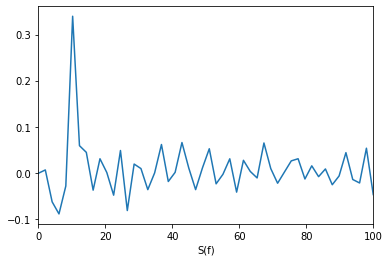

Frequency  f = 10.000Hz
Maximum value is at f = 10.213Hz
Maximum Value       = 0.340 (0.33962000)


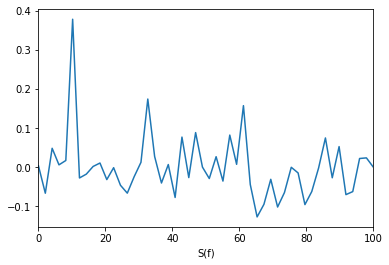

Frequency  f = 10.000Hz
Maximum value is at f = 10.213Hz
Maximum Value       = 0.378 (0.37791600)


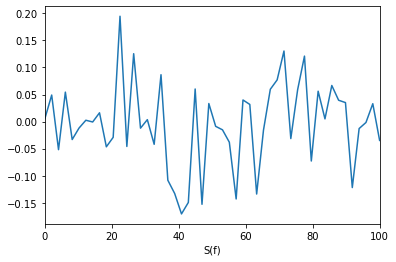

Frequency  f = 10.000Hz
Maximum value is at f = 22.457Hz
Maximum Value       = 0.195 (0.19455800)


In [18]:
for i in range(1,6):
    prober(f"data_0{i}.csv", f=10, outputFile=f"results_{i}_S1.csv", template="temp_bank.csv", mod=1)
    new_plot_data(prober_results=f"results_{i}_S1.csv", mode=1, freq=10)

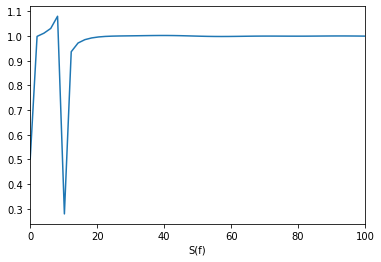

Frequency  f = 10.000Hz
Minimum value is at f = 10.213Hz
Minimum Value       = 0.279 (0.27890900)


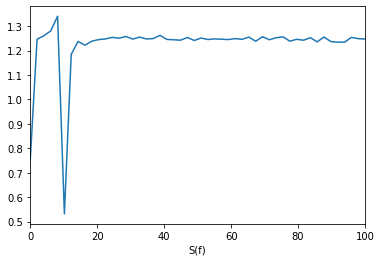

Frequency  f = 10.000Hz
Minimum value is at f = 10.213Hz
Minimum Value       = 0.532 (0.53158300)


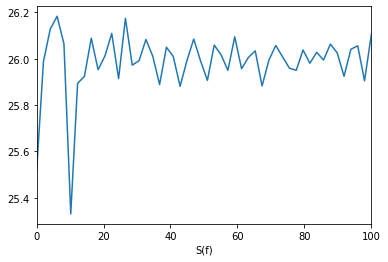

Frequency  f = 10.000Hz
Minimum value is at f = 10.213Hz
Minimum Value       = 25.331 (25.33050000)


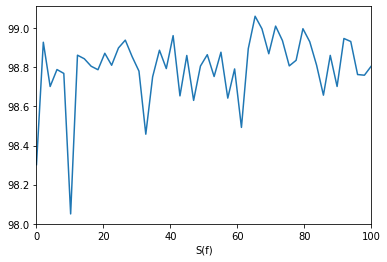

Frequency  f = 10.000Hz
Minimum value is at f = 10.213Hz
Minimum Value       = 98.050 (98.04990000)


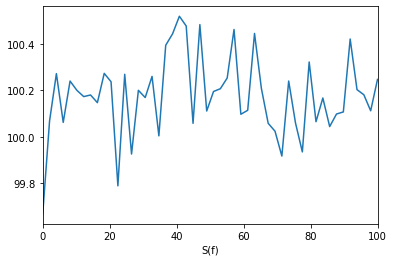

Frequency  f = 10.000Hz
Minimum value is at f = 0.010Hz
Minimum Value       = 99.668 (99.66790000)


In [19]:
for i in range(1,6):
    prober(f"data_0{i}.csv", f=10, outputFile=f"results_{i}_S2.csv", template="temp_bank.csv", mod=2)
    new_plot_data(prober_results=f"results_{i}_S2.csv", mode=2, freq=10)

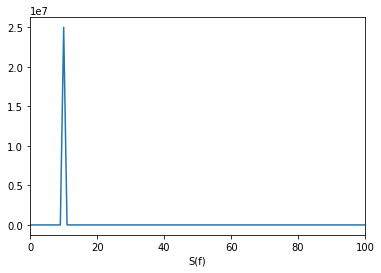

Frequency  f = 10.000Hz
Maximum value is at f = 10.000Hz
Maximum Value       = 25000000.000 (25000000.00000000)


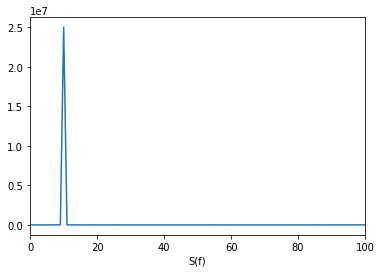

Frequency  f = 10.000Hz
Maximum value is at f = 10.000Hz
Maximum Value       = 25001000.000 (25001000.00000000)


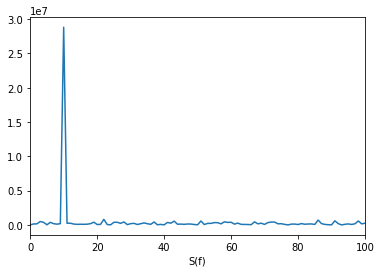

Frequency  f = 10.000Hz
Maximum value is at f = 10.000Hz
Maximum Value       = 28829000.000 (28829000.00000000)


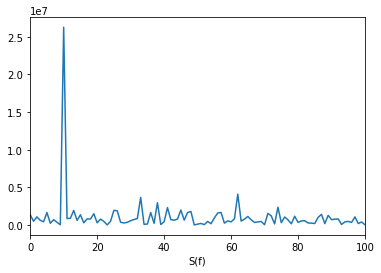

Frequency  f = 10.000Hz
Maximum value is at f = 10.000Hz
Maximum Value       = 26278200.000 (26278200.00000000)


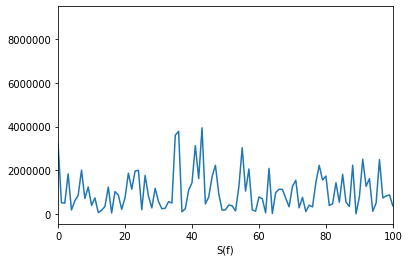

Frequency  f = 10.000Hz
Maximum value is at f = 4948.000Hz
Maximum Value       = 9055060.000 (9055060.00000000)


In [20]:
for i in range(1,6):
    prober(f"data_0{i}.csv", f=10, outputFile=f"results_{i}_S3.csv", template="temp_bank.csv", mod=3)
    new_plot_data(prober_results=f"results_{i}_S3.csv", mode=3, freq=10)

# **Task 5**
Develop an strategy to find signal with prober if the signal parameters (A, f, φ) are unknown.

In [21]:
generate_source("data_task5.csv", sigma=1, f=20, A=2, phi=0.5)

/home/aswathy/DATA_ANALYSIS/datalab/code/generate_source -o /home/aswathy/DATA_ANALYSIS/datalab/solutions/Exercise_1/data_task5.csv -s 1 -d 0.0001 -N 10000 -f 20 -p 0.5 -a 2 -r 0


In [22]:
def task5(iFile, oFile, mode):          
    nfrq = 300
    nphi = 50
    freq = np.linspace(0.01, 100.0, nfrq)
    phi = np.linspace(0, 2*np.pi, nphi)

    with open(f"{data_dir}/temp_bank_task5.csv", "w") as file:
        for i in range(nfrq):
            for j in range(nphi):
                file.write("{0} {1}\n".format(freq[i], phi[j]))
                
    prober(inputFile=iFile, outputFile=oFile, template="temp_bank_task5.csv", mod=mode)
    
    data = np.loadtxt(os.path.join(data_dir, oFile))
    
    if mode == 3:
        plt.plot(data[:,0],data[:,2])
    else:
        f = data[:,0]
        p = data[:,1]
        S = data[:,2]
        S = np.reshape(S, (nfrq,nphi))
        f = np.reshape(f, (nfrq,nphi))
        p = np.reshape(p, (nfrq,nphi))
        plt.contourf(f,p,S)
        plt.colorbar()
    
    #S_2 searching for the minimum value
    if mode == 2:
        best = np.where(data[:,2] == np.min(data[:,2]))
        #print("Frequency  f = {0:.3f}Hz".format(freq))
        print("Minimum value is at f = {0:.3f}Hz".format(data[:,0][best][0]))
        print("Minimum value is at phi = {0:.3f}".format(data[:,1][best][0]))
        print("Minimum Value       = {0:.3f} ({0:.8f})".format(data[:,2][best][0]))
    else:
        best = np.where(data[:,2] == np.max(data[:,2]))
        #print("Frequency  f = {0:.3f}Hz".format(freq))
        print("Maximum value is at f = {0:.3f}Hz".format(data[:,0][best][0]))
        print("Maximum value is at phi = {0:.3f}".format(data[:,1][best][0]))
        print("Maximum Value       = {0:.3f} ({0:.8f})".format(data[:,2][best][0]))
        


Minimum value is at f = 20.075Hz
Minimum value is at phi = 0.256
Minimum Value       = 1.545 (1.54539000)


(15.0, 25.0)

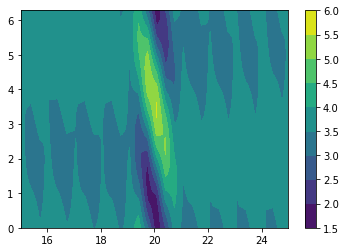

In [23]:
task5(iFile="data_task5.csv", oFile="results_task5.csv", mode=2)
plt.xlim([15.0, 25.0])

Maximum value is at f = 10.042Hz
Maximum value is at phi = 6.155
Maximum Value       = 0.497 (0.49745600)


(5.0, 15.0)

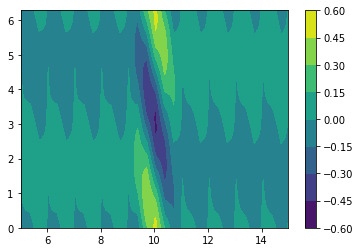

In [24]:
task5(iFile="data_01.csv", oFile="results_1_S1.csv", mode=1)
plt.xlim([5.0, 15.0])